In [383]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [384]:
# Load the dataset
df = pd.read_csv(r'E:\Used Cars Price Prediction Data.csv')

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3000 non-null   int64  
 1   Name               3000 non-null   object 
 2   Location           3000 non-null   object 
 3   Year               3000 non-null   int64  
 4   Kilometers_Driven  3000 non-null   int64  
 5   Fuel_Type          3000 non-null   object 
 6   Transmission       3000 non-null   object 
 7   Owner_Type         3000 non-null   object 
 8   Mileage            3000 non-null   object 
 9   Engine             2980 non-null   object 
 10  Power              2980 non-null   object 
 11  Seats              2977 non-null   float64
 12  New_Price          423 non-null    object 
 13  Price              3000 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 328.3+ KB


In [386]:
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 20
Power                  20
Seats                  23
New_Price            2577
Price                   0
dtype: int64


In [387]:
df.drop(columns=['New_Price','Unnamed: 0'], inplace=True)
df.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [388]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,3000.000000,3.000000e+03,2977.000000,3000.000000
mean,2013.383000,5.991413e+04,5.291233,9.752037
std,3.226729,1.243957e+05,0.832089,11.475161
min,1999.000000,1.710000e+02,2.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.304850e+04,5.000000,5.700000
75%,2016.000000,7.300000e+04,5.000000,10.500000
max,2019.000000,6.500000e+06,10.000000,97.070000


In [389]:
# Function to extract numeric values from strings
def extract_numeric(value):
    numbers = re.findall(r'\d+\.?\d*', str(value))
    return float(numbers[0]) if numbers else None

# Apply the function to relevant columns
df['Mileage'] = df['Mileage'].apply(extract_numeric)
df['Engine'] = df['Engine'].apply(extract_numeric)
df['Power'] = df['Power'].apply(extract_numeric)


df['Seats'] = df['Seats'].fillna(df['Seats'].mode()[0])
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].mean())
df['Engine'] = df['Engine'].fillna(df['Engine'].mean())
df['Power'] = df['Power'].fillna(df['Power'].mean())

In [390]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [391]:
df.describe(include="object")

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,3000,3000,3000,3000,3000
unique,1336,11,4,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,24,399,1629,2129,2447


In [392]:
label_encoder = LabelEncoder()
df['Name'] = label_encoder.fit_transform(df['Name'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Owner_Type'] = label_encoder.fit_transform(df['Owner_Type'])

In [393]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,865,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,372,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,352,2,2011,46000,3,1,0,18.20,1199.0,88.70,5.0,4.50
3,756,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,14,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


In [394]:
X = df.drop('Price', axis=1)
y = df['Price']

In [395]:
X.shape

(3000, 11)

In [396]:
y.shape

(3000,)

In [397]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [398]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [399]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

In [400]:
# MSE for linear regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Mean Squared Error (MSE) for Linear Regression: {mse_linear}")

Mean Squared Error (MSE) for Linear Regression: 43.082917775478236


In [401]:
# RMSE for linear regression
rmse_linear = np.sqrt(mse_linear)
print(f"Root Mean Squared Error (RMSE) for Linear Regression: {rmse_linear}")

Root Mean Squared Error (RMSE) for Linear Regression: 6.563757900431599


In [402]:
# MAE for linear regression
from sklearn.metrics import mean_absolute_error
mae_linear = mean_absolute_error(y_test , y_pred_linear)
print(f"Mean Squared Error (MAE) for Linear Regression: {mae_linear}")

Mean Squared Error (MAE) for Linear Regression: 3.9630350329587887


In [403]:
# R-squared for linear regression
from sklearn.metrics import r2_score
r2 = r2_score(y_test , y_pred_linear)
print(f"R-squared: {r2}")

R-squared: 0.693752832187212


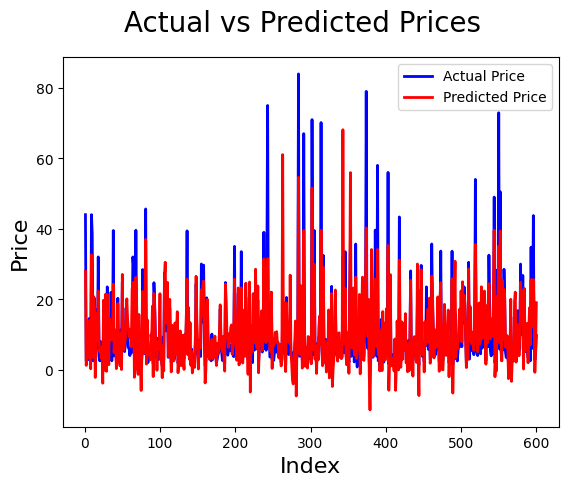

In [404]:
import matplotlib.pyplot as plt

# Use the length of y_test for the x-axis
c = [i for i in range(1, len(y_test) + 1)]  # Adjust the range based on y_test length

# Create the figure
fig = plt.figure()

# Plot actual values
plt.plot(c, y_test, color="blue", linewidth=2, linestyle="-", label='Actual Price')

# Plot predicted values
plt.plot(c, y_pred_linear, color="red", linewidth=2, linestyle="-", label='Predicted Price')

# Add title and labels
fig.suptitle('Actual vs Predicted Prices', fontsize=20)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Index', fontsize=16)  # Add x-label if needed

# Add a legend
plt.legend()

# Show the plot
plt.show()

Text(0, 0.5, 'ytest-ypred')

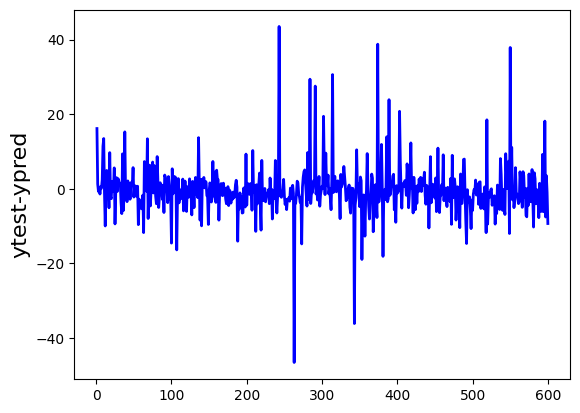

In [405]:
# Error terms
c = [i for i in range(1, len(y_test) + 1)]  # Adjust the range based on y_test lengthfig = plt.figure()
plt.plot(c,y_test-y_pred_linear, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)             
plt.ylabel('ytest-ypred', fontsize=16)     

In [406]:
#KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

In [407]:
# MSE for knn
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"Mean Squared Error (MSE) for KNN Regression: {mse_knn}")

Mean Squared Error (MSE) for KNN Regression: 19.45057853333333


In [408]:
# MAE for knn
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(f"Mean Absolute Error (MAE) for KNN Regression: {mae_knn}")

Mean Absolute Error (MAE) for KNN Regression: 2.22274


In [409]:
# R-squared for knn
r2_Knn = r2_score(y_test , y_pred_knn)
print(f"R-squared: {r2_Knn}")

R-squared: 0.8617390628184438


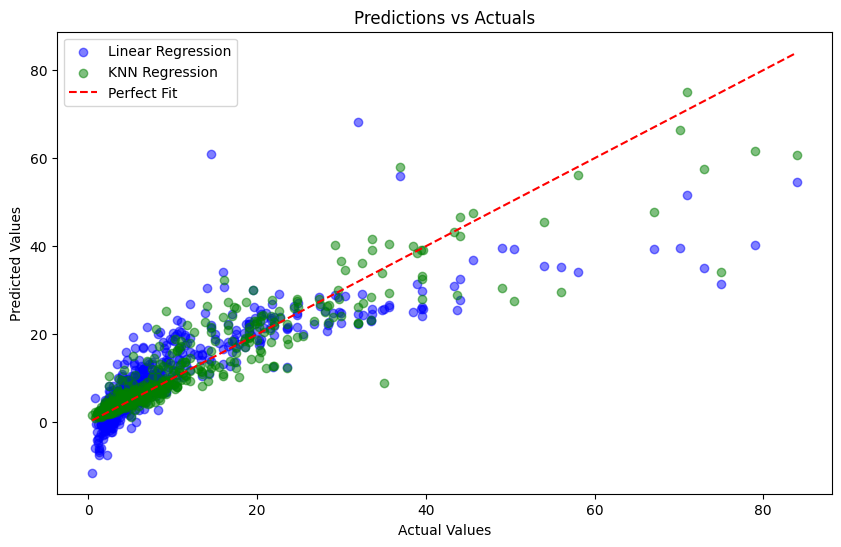

In [410]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_knn, alpha=0.5, color='green', label='KNN Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title("Predictions vs Actuals")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()


In [411]:
metrics = {
    "Model": ["Linear Regression", "KNN Regression"],
    "MSE": [mse_linear, mse_knn],
    "MAE": [mae_linear, mae_knn],
    "R²": [r2, r2_Knn]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)


               Model        MSE       MAE        R²
0  Linear Regression  43.082918  3.963035  0.693753
1     KNN Regression  19.450579  2.222740  0.861739
